<a href="https://colab.research.google.com/github/dhanyab123/tweet/blob/main/Scikit_Tweet_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# DETECTION OF AGRESSIVE TWEETS USING DIFFERENT CLASSIFIERS

---

Using the kaggle dataset containing 20000 tweets which are classified as trolls or just normal tweets, we can create a supervised learning model to further classify other tweets so as to decrease cyber-bullying and other situations that arise in the online space.

DATASET link:
https://www.kaggle.com/dataturks/dataset-for-detection-of-cybertrolls

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
# Assigning the json file to the name 'file'
file = 'Dataset for Detection of Cyber-Trolls.json'

In [3]:
# Opening the file to view the values
with open(file) as data:
  for eachline in data:
    # reading the data in each line by using the object 'val' which loads each line
    val = json.loads(eachline)
    print(val['content'])
    # as the element under column 'annotation' is a dictionary with two key value pairs 
    # using g to get the value for the key: 'label' 
    # as the value for that is a list with one string 1 or 0 to indicate if the message is a troll
    # using list index [0] to get that string value
    g = val['annotation'].get('label')[0]
    # to make the loop stop after one output - break statement is used
    break

 Get fucking real dude.


In [4]:
# Creating a class named 'review' which takes the feedback and review as input to 
# provide us with the data - if the sentiment is a troll human or something else

class review:
  def __init__(self, feedback, rating):
    self.feedback = feedback
    self.rating = rating
    self.senti = self.get_senti()
  def get_senti(self):
    if self.rating == '0':
      return 'Not Aggressive'
    elif self.rating == '1':
      return 'Aggressive'

In [5]:
# Using a list called 'vals' to store the values that we get from the json file
vals = []

with open(file) as data:
  for eachline in data:
    # print(eachline)
    val = json.loads(eachline)
    g = val['annotation'].get('label')[0]
    vals.append(review(val['content'],g))

In [6]:
# To view the values in the list vals where the index to be viewed can be obtained by changing the value of x
x = 9000

print('Content : \n',vals[x].feedback)
print('Rating : \n',vals[x].rating)
print('Sentiment : \n',vals[x].senti)

Content : 
 lol  what?  Tell Danielle that I have mad skills when it comes to reading people  fuck.
Rating : 
 0
Sentiment : 
 Not Aggressive


In [7]:
# Importing sklearn
from sklearn.model_selection import train_test_split

In [8]:
# checking the length of the data
len(vals)

20001

In [9]:
# using the imported function to split our data into train and test sets where the test set has 25% of the data
train, test = train_test_split(vals)

print(len(train), len(test))

15000 5001


In [10]:
# Again used to view the elements at certain indexes
x = 30

print('Feedback : \n',train[x].feedback)
print('Rating : \n',train[x].rating)
print('Sentiment : \n',train[x].senti)

Feedback : 
  Does it bother you that travesti immitate your favorite singers?
Rating : 
 0
Sentiment : 
 Not Aggressive


In [11]:
# Splitting the x and y values of training data
train_x = [x.feedback for x in train]
train_y = [x.senti for x in train]

# Splitting the x and y values of testing data
test_x = [x.feedback for x in test]
test_y = [x.senti for x in test]

# train_x[1]

# train_y[1]

In [12]:
# import sklearn feature extractor

from sklearn.feature_extraction.text import CountVectorizer

In [13]:
vectorizer = CountVectorizer()

# converting the train text into a vector
vector_train_x = vectorizer.fit_transform(train_x)

# converting the test text into a vector
vector_test_x = vectorizer.transform(test_x)

In [14]:
# to collect values for final analysis

# the scores of each model comparing the predicted and the real answers for the test data
scores = []

# the f1 scores of each model
fi = []



---


## Linear SVM

In [15]:
# importing support vector machine
from sklearn import svm

In [16]:
# loading the svm 
clsf = svm.SVC(kernel='linear')

# Performing the training 
clsf.fit(vector_train_x, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
# to view the predictions that the classifier makes on the test data 
print(clsf.predict(vector_test_x[0:10]))

# to view the expected results
print(test_y[0:10])

['Not Aggressive' 'Aggressive' 'Not Aggressive' 'Not Aggressive'
 'Aggressive' 'Aggressive' 'Aggressive' 'Aggressive' 'Not Aggressive'
 'Not Aggressive']
['Not Aggressive', 'Aggressive', 'Not Aggressive', 'Aggressive', 'Not Aggressive', 'Not Aggressive', 'Aggressive', 'Aggressive', 'Not Aggressive', 'Not Aggressive']


In [18]:
# Giving external inputs to the classifier
sample = ['dork', 'happy birthday', 'BIG BAD MAN', 'i hate you', 'dumbo']

our = vectorizer.transform(sample)

In [19]:
o = clsf.predict(our)

In [20]:
for i in range (len(o)):
  print('text:', sample[i])
  print('prediction:', o[i])
  print('-------------------------------------------------')

text: dork
prediction: Not Aggressive
-------------------------------------------------
text: happy birthday
prediction: Not Aggressive
-------------------------------------------------
text: BIG BAD MAN
prediction: Not Aggressive
-------------------------------------------------
text: i hate you
prediction: Aggressive
-------------------------------------------------
text: dumbo
prediction: Not Aggressive
-------------------------------------------------


In [21]:
# To append the score of the classifier into the list
scores.append(clsf.score(vector_test_x, test_y))

In [22]:
# To append the f1 score of the classifier into the list

from sklearn.metrics import f1_score

fi.append(f1_score(test_y, clsf.predict(vector_test_x), average=None))

---
### Radial Basis SVM

In [23]:
# loading the svm 
clsf = svm.SVC(kernel='rbf')

# Performing the training 
clsf.fit(vector_train_x, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
print(clsf.predict(vector_test_x[0:10]))
print(test_y[0:10])

['Not Aggressive' 'Aggressive' 'Not Aggressive' 'Not Aggressive'
 'Aggressive' 'Not Aggressive' 'Aggressive' 'Aggressive' 'Not Aggressive'
 'Not Aggressive']
['Not Aggressive', 'Aggressive', 'Not Aggressive', 'Aggressive', 'Not Aggressive', 'Not Aggressive', 'Aggressive', 'Aggressive', 'Not Aggressive', 'Not Aggressive']


In [25]:
scores.append(clsf.score(vector_test_x, test_y))

In [26]:
fi.append(f1_score(test_y, clsf.predict(vector_test_x), average=None))

---
### KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier 

In [28]:
nei = KNeighborsClassifier(n_neighbors= 2)
nei.fit(vector_train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [29]:
print(nei.predict(vector_test_x[0:10]))
print(test_y[0:10])

['Not Aggressive' 'Aggressive' 'Aggressive' 'Aggressive' 'Aggressive'
 'Not Aggressive' 'Aggressive' 'Aggressive' 'Aggressive' 'Aggressive']
['Not Aggressive', 'Aggressive', 'Not Aggressive', 'Aggressive', 'Not Aggressive', 'Not Aggressive', 'Aggressive', 'Aggressive', 'Not Aggressive', 'Not Aggressive']


In [30]:
scores.append(nei.score(vector_test_x, test_y))

In [31]:
fi.append(f1_score(test_y, nei.predict(vector_test_x), average=None))

---
## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
tre = DecisionTreeClassifier(random_state = 42)

tre.fit(vector_train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [34]:
print(tre.predict(vector_test_x[0:10]))
print(test_y[0:10])

['Aggressive' 'Aggressive' 'Not Aggressive' 'Aggressive' 'Aggressive'
 'Not Aggressive' 'Aggressive' 'Aggressive' 'Not Aggressive'
 'Not Aggressive']
['Not Aggressive', 'Aggressive', 'Not Aggressive', 'Aggressive', 'Not Aggressive', 'Not Aggressive', 'Aggressive', 'Aggressive', 'Not Aggressive', 'Not Aggressive']


In [35]:
scores.append(tre.score(vector_test_x, test_y))

In [36]:
fi.append(f1_score(test_y, tre.predict(vector_test_x), average=None))

---
## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfor = RandomForestClassifier(random_state= 42)

rfor.fit(vector_train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [39]:
print(rfor.predict(vector_test_x[0:10]))
print(test_y[0:10])

['Not Aggressive' 'Aggressive' 'Not Aggressive' 'Aggressive' 'Aggressive'
 'Not Aggressive' 'Aggressive' 'Aggressive' 'Not Aggressive'
 'Not Aggressive']
['Not Aggressive', 'Aggressive', 'Not Aggressive', 'Aggressive', 'Not Aggressive', 'Not Aggressive', 'Aggressive', 'Aggressive', 'Not Aggressive', 'Not Aggressive']


In [40]:
scores.append(rfor.score(vector_test_x, test_y))

In [41]:
fi.append(f1_score(test_y, rfor.predict(vector_test_x), average = None))

---
## ADA Boost

In [42]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
ada = AdaBoostClassifier(random_state= 42)

ada.fit(vector_train_x, train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [44]:
print(ada.predict(vector_test_x[0:10]))
print(test_y[0:10])

['Not Aggressive' 'Not Aggressive' 'Aggressive' 'Not Aggressive'
 'Aggressive' 'Aggressive' 'Not Aggressive' 'Aggressive' 'Not Aggressive'
 'Not Aggressive']
['Not Aggressive', 'Aggressive', 'Not Aggressive', 'Aggressive', 'Not Aggressive', 'Not Aggressive', 'Aggressive', 'Aggressive', 'Not Aggressive', 'Not Aggressive']


In [45]:
scores.append(ada.score(vector_test_x, test_y))

In [46]:
fi.append(f1_score(test_y, ada.predict(vector_test_x), average = None))

---
## Gaussian Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
gnb = GaussianNB()

# constant to hold the vector train x values as a dense numpy array which is required by the gaussian nb to work
dense = vector_train_x.todense()

gnb.fit(dense, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
# constant to hold vector test x values
dense_test = vector_test_x.todense()

print(gnb.predict(dense_test[0:10]))
print(test_y[0:10])

['Aggressive' 'Aggressive' 'Not Aggressive' 'Aggressive' 'Aggressive'
 'Not Aggressive' 'Aggressive' 'Aggressive' 'Aggressive' 'Not Aggressive']
['Not Aggressive', 'Aggressive', 'Not Aggressive', 'Aggressive', 'Not Aggressive', 'Not Aggressive', 'Aggressive', 'Aggressive', 'Not Aggressive', 'Not Aggressive']


In [50]:
scores.append(gnb.score(dense_test, test_y))

In [51]:
fi.append(f1_score(test_y, gnb.predict(dense_test), average = None))

---
## Gaussian Process Classifier

In [52]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [53]:
gpc = RandomForestClassifier(random_state= 42).fit(vector_train_x, train_y)

In [54]:
print(gpc.predict(vector_test_x[0:10]))
print(test_y[0:10])

['Not Aggressive' 'Aggressive' 'Not Aggressive' 'Aggressive' 'Aggressive'
 'Not Aggressive' 'Aggressive' 'Aggressive' 'Not Aggressive'
 'Not Aggressive']
['Not Aggressive', 'Aggressive', 'Not Aggressive', 'Aggressive', 'Not Aggressive', 'Not Aggressive', 'Aggressive', 'Aggressive', 'Not Aggressive', 'Not Aggressive']


In [55]:
scores.append(gpc.score(vector_test_x, test_y))

In [56]:
fi.append(f1_score(test_y, gpc.predict(vector_test_x), average = None))

---
## Quadratic Discriminant Analysis

In [57]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [58]:
qda = QuadraticDiscriminantAnalysis()

# this also needs a dense numpy array
qda.fit(dense, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [59]:
print(qda.predict(dense_test[0:10]))
print(test_y[0:10])

['Not Aggressive' 'Aggressive' 'Not Aggressive' 'Aggressive' 'Aggressive'
 'Not Aggressive' 'Aggressive' 'Aggressive' 'Not Aggressive'
 'Not Aggressive']
['Not Aggressive', 'Aggressive', 'Not Aggressive', 'Aggressive', 'Not Aggressive', 'Not Aggressive', 'Aggressive', 'Aggressive', 'Not Aggressive', 'Not Aggressive']


In [60]:
scores.append(qda.score(dense_test, test_y))

In [61]:
fi.append(f1_score(test_y, qda.predict(dense_test), average = None))

---
## Neural Net

In [62]:
from sklearn.neural_network import MLPClassifier

In [63]:
mlp = MLPClassifier(random_state= 42)

mlp.fit(vector_train_x, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [64]:
print(mlp.predict(vector_test_x[0:10]))
print(test_y[0:10])

['Not Aggressive' 'Aggressive' 'Not Aggressive' 'Aggressive' 'Aggressive'
 'Not Aggressive' 'Aggressive' 'Aggressive' 'Not Aggressive'
 'Not Aggressive']
['Not Aggressive', 'Aggressive', 'Not Aggressive', 'Aggressive', 'Not Aggressive', 'Not Aggressive', 'Aggressive', 'Aggressive', 'Not Aggressive', 'Not Aggressive']


In [65]:
scores.append(mlp.score(vector_test_x, test_y))

In [66]:
fi.append(f1_score(test_y, mlp.predict(vector_test_x), average = None))



---


## Analysis

---



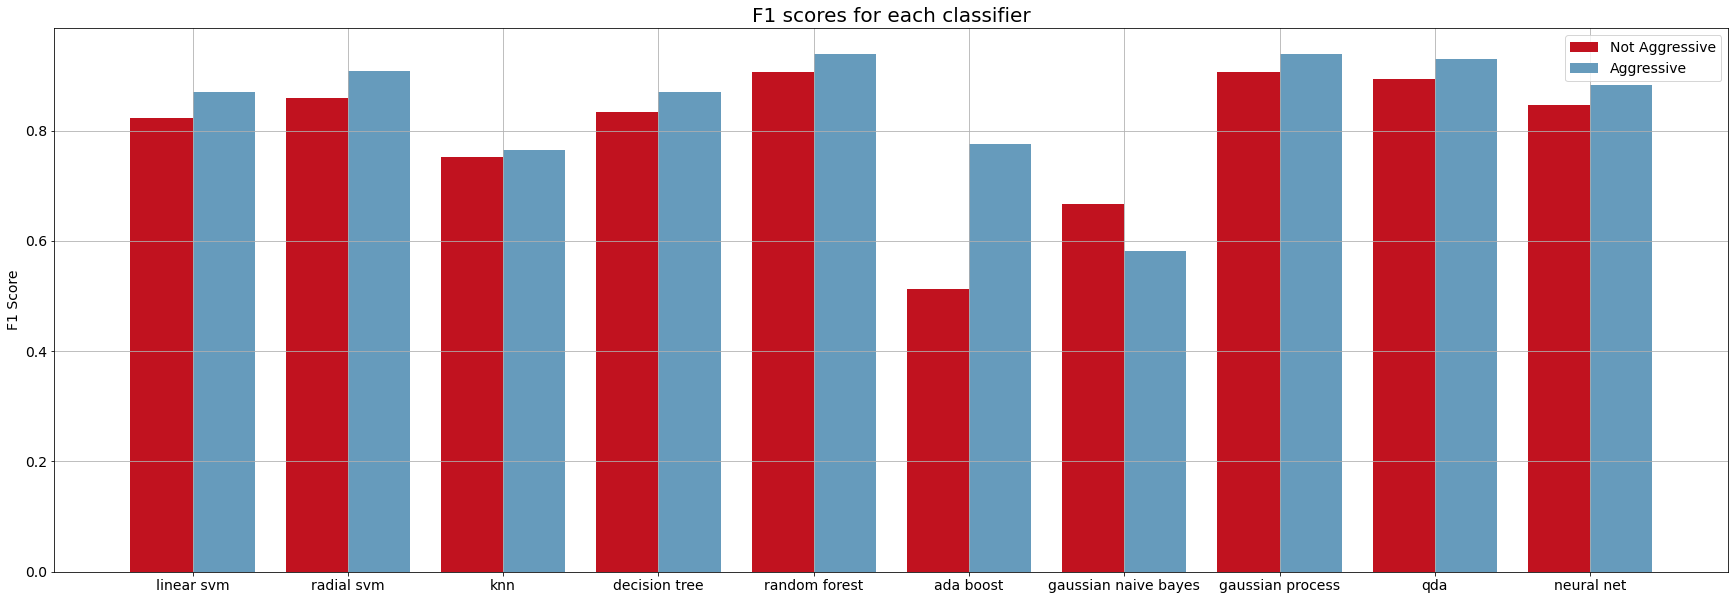

In [69]:
# To graph the F1 results of all the classifiers

x = ['linear svm','radial svm','knn','decision tree','random forest','ada boost','gaussian naive bayes','gaussian process','qda','neural net']

y = [i[0] for i in fi]
z = [i[1] for i in fi]

plt.figure(figsize=(30,10))

xa = np.arange(len(x))

plt.bar(xa-0.2, y, 0.4, label = 'Not Aggressive', color = '#c1121f')
plt.bar(xa+0.2, z, 0.4, label = 'Aggressive', color = '#669bbc')

plt.xticks(xa, x, fontsize = 14)
plt.yticks(fontsize = 14)

plt.title('F1 scores for each classifier', fontsize = 20)

plt.ylabel('F1 Score', fontsize = 14)

plt.legend(fontsize = 14)

plt.grid()

plt.show()


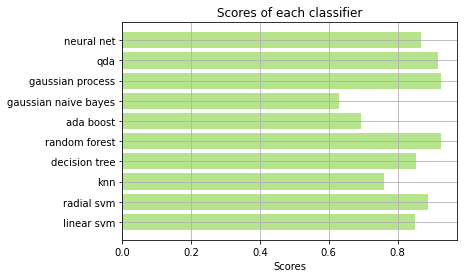

In [68]:
# To plot the scores of the analysis

# plt.figure(figsize=(30,10))

plt.barh(x,scores, color = '#b5e48c')

plt.title('Scores of each classifier')

plt.xlabel('Scores')

plt.grid()

plt.show()

We can see that Quadratic Discriminant Analysis, Gaussian Process Classification and Random Forest works best with this data.


---



---

